# Analysis of the overall data collected
#### Author : Sagun Shakya

## Importing the necessary libraries.

In [81]:
# Necessary libraries.
from numpy import intersect1d, nan, unique
import pandas as pd
from collections import Counter
from ast import literal_eval
import os
from os.path import join, exists
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update({'font.size': 18})

from warnings import filterwarnings
filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [35]:
# Read File.
filepath = r'D:\ML_projects\IPV-Project\annotation\data\overall.xlsx'
df = pd.read_excel(filepath)
df.shape

(5850, 12)

## Convert the datatypes of the stringed lists to lists.

In [41]:
df['tokens'] = df['tokens'].apply(literal_eval)
df['ac'] = df['ac'].apply(literal_eval)
df['ap'] = df['ap'].apply(literal_eval)

In [36]:
df.sample(5)

,id,source,annotator,text,tokens,ac,ap,conf,ipv,link,keyword,date
2214,2215,simulation_ipv,shr,मिडियामा गएर जे पायो तेही कुरा नगर रन्डी मेरो हातबाट भेट्लिस नि |,"['मिडियामा', 'गएर', 'जे', 'पायो', 'तेही', 'कुरा', 'नगर', 'रन्डी', 'मेरो', 'हातबाट', 'भेट्लिस', 'नि', '|']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-profanity', 'O', 'B-physical_threat', 'I-physical_threat', 'I-physical_threat', 'O']","['_', '_', '_', '_', '_', '_', '_', '0', '_', '0', '0', '0', '_']",9,1,NaN,NaN,NaN
4547,4548,twitter,krn,"बर्ष मात्र फेरिएन , नाबालिकाको बयान पनि फेरियो , बलात्कार भएको हैन भने अर्काको इज्जतको धज्जी किन उडाउनु !","['बर्ष', 'मात्र', 'फेरिएन', ',', 'नाबालिकाको', 'बयान', 'पनि', 'फेरियो', ',', 'बलात्कार', 'भएको', 'हैन', 'भने', 'अर्काको', 'इज्जतको', 'धज्जी', 'किन', 'उडाउनु', '!']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']","['_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_']",1,0,https://twitter.com/Punamkun381256/status/1516208419585155072,बलात्कारी OR बलत्कार OR बलात्कार,2022-04-19 05:58:51
5561,5562,twitter,krn,"महावली हनुमान जीले त्यति बेलै लंका पुरै जलाई दिएको भए , अहिले यत्रो बेज्जत त हुने थिएन ।","['महावली', 'हनुमान', 'जीले', 'त्यति', 'बेलै', 'लंका', 'पुरै', 'जलाई', 'दिएको', 'भए', ',', 'अहिले', 'यत्रो', 'बेज्जत', 'त', 'हुने', 'थिएन', '।']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']","['_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_']",8,0,https://twitter.com/SarojPo51816539/status/1516622737120591872,जलाई,2022-04-20 09:25:12
3,4,simulation_ipv,shr,अलिकति लाज छैन है तलाई त दुनियासंग रात बिताउनि इज्जत नभएकी केटि |,"['अलिकति', 'लाज', 'छैन', 'है', 'तलाई', 'त', 'दुनियासंग', 'रात', 'बिताउनि', 'इज्जत', 'नभएकी', 'केटि', '|']","['O', 'B-profanity', 'I-profanity', 'O', 'O', 'O', 'B-character_assasination', 'I-character_assasination', 'I-character_assasination', 'I-character_assasination', 'I-character_assasination', 'I-character_assasination', 'O']","['_', '0', '0', '_', '_', '_', '1', '1', '1', '1', '1', '1', '_']",6,1,NaN,NaN,NaN
1210,1211,simulation_ipv,krn,कसैले नजानेको तैले जानेकी रहिछेस जाबो केहि पैसाको लोभमा अरुलाई गाली गर्दै हिड्ने तँ जस्तो गतिछाडा आइमाई को के कुरा सुन्नु |,"['कसैले', 'नजानेको', 'तैले', 'जानेकी', 'रहिछेस', 'जाबो', 'केहि', 'पैसाको', 'लोभमा', 'अरुलाई', 'गाली', 'गर्दै', 'हिड्ने', 'तँ', 'जस्तो', 'गतिछाडा', 'आइमाई', 'को', 'के', 'कुरा', 'सुन्नु', '|']","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-sexism', 'I-sexism', 'O', 'O', 'O', 'O', 'O']","['_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '1', '1', '_', '_', '_', '_', '_']",8,1,NaN,NaN,NaN


## Frequency Distribution of sources of data.

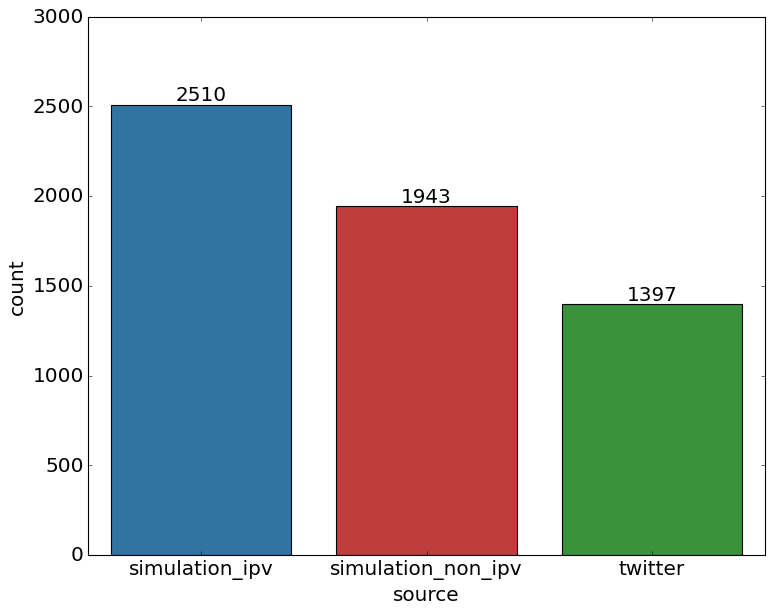

In [24]:
plt.figure(figsize = (10,8))
plot = sns.countplot(df['source'], palette = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:purple'])
for container in plot.containers:
        plot.bar_label(container)
plt.tight_layout()
plt.show()

### Freq distribution of Aspect Categories.

In [66]:
temp = df['ac'].dropna().sum()
temp = [ff[2:] for ff in temp if temp != "O"]

counts = dict(Counter(temp))
print("Number of 'O' tags : ", counts[''])
del counts['']
counts =  dict(sorted(counts.items(), key=lambda item: item[1], reverse = True))

Number of 'O' tags :  68411


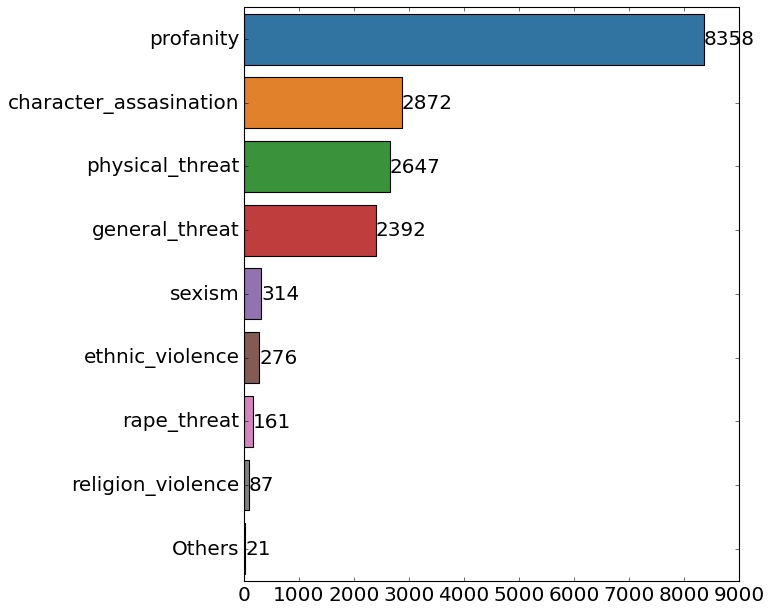

In [67]:
plt.figure(figsize = (10,8))
plot = sns.barplot(y = list(counts.keys()), x = list(counts.values()), palette = 'tab10', order = list(counts.keys()))
for container in plot.containers:
        plot.bar_label(container)
plt.tight_layout()
plt.show()

### IPV counts.

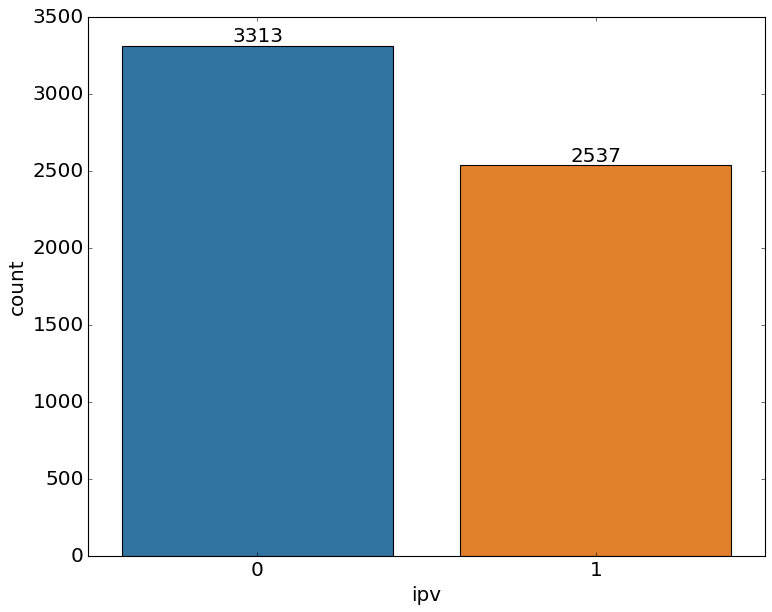

In [75]:
plt.figure(figsize = (10,8))
plot = sns.countplot(df['ipv'], palette = 'tab10')
for container in plot.containers:
        plot.bar_label(container)
plt.tight_layout()
plt.show()

#### IPV counts on the basis of source.

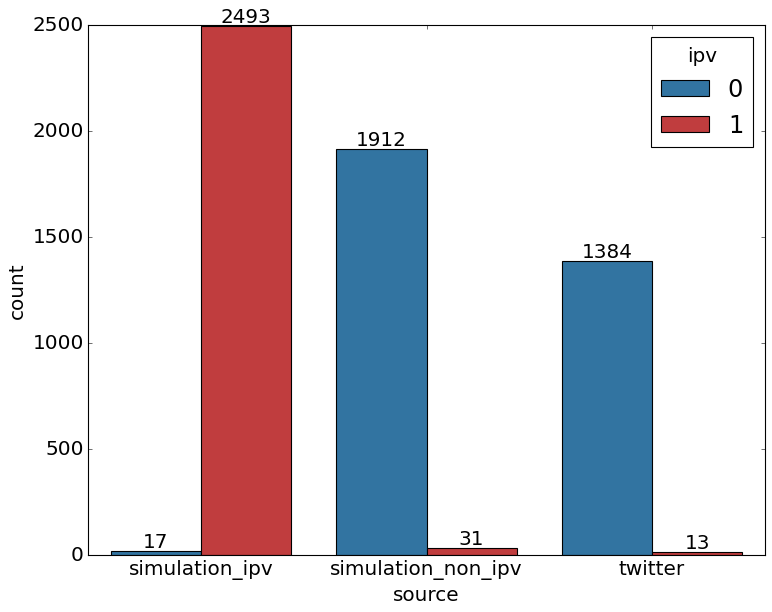

In [107]:
plt.figure(figsize = (10,8))
plot = sns.countplot(df['source'], palette = ['tab:blue', 'tab:red'], hue = df['ipv'])
for container in plot.containers:
        plot.bar_label(container)
plt.tight_layout()
plt.show()

### Annotator stats.

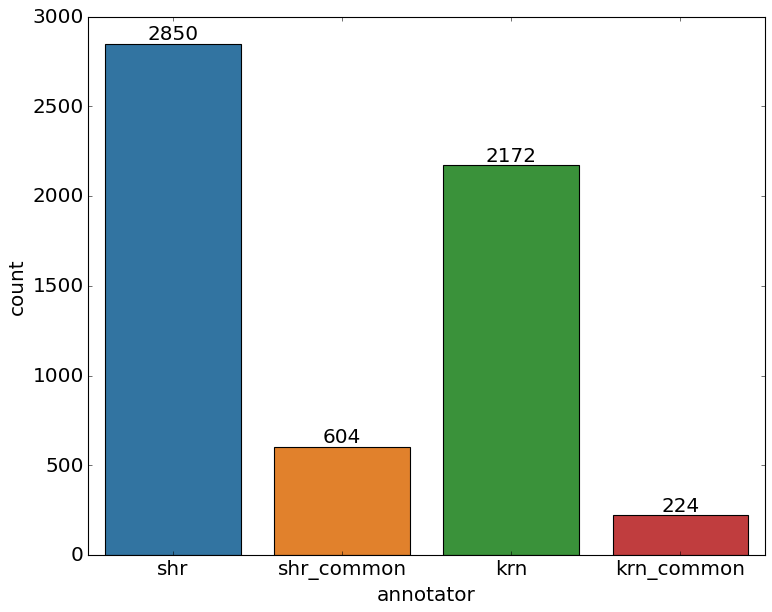

In [79]:
plt.figure(figsize = (10,8))
plot = sns.countplot(df['annotator'], palette = 'tab10')
for container in plot.containers:
        plot.bar_label(container)
plt.tight_layout()
plt.show()

### Number of IPV according to annotator.

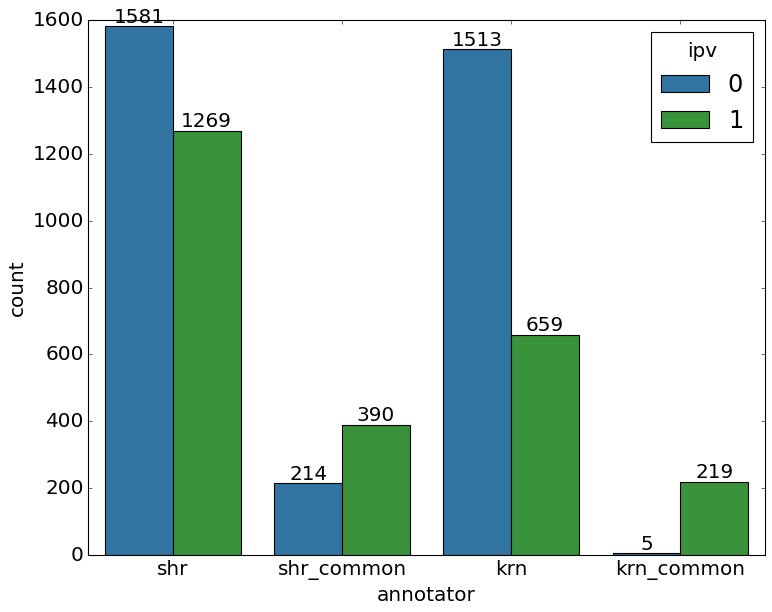

In [103]:
plt.figure(figsize = (10,8))
plot = sns.countplot(df['annotator'], palette = ['tab:blue', 'tab:green'], hue = df['ipv'])
for container in plot.containers:
        plot.bar_label(container)
plt.tight_layout()
plt.show()

### Number of sentence with only "O" tags.

In [96]:
num_sentences = df.shape[0]
print(f'Total number of sentences annotated : {num_sentences}')

ac_O_only = df.ac.apply(lambda x : len(unique(x)))
num_ac_O_only = (ac_O_only == 1).sum()
print(f"Number of sentences with only 'O' tags : {num_ac_O_only}\nIn Percentage : {num_ac_O_only * 100 / num_sentences : 5.3f} %")

print(f'Remaining sentences to be used for aspect term extraction task : {num_sentences - num_ac_O_only}')


Total number of sentences annotated : 5850
Number of sentences with only 'O' tags : 1774
In Percentage :  30.325 %
Remaining sentences to be used for aspect term extraction task : 4076
